In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [5]:
sns.set_style("darkgrid")

In [6]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,"270,000.000","1,293,502.500","35,698.500","1,129,500.000",Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,"-1,186.000",-291,nan,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.000","135,000.000","6,750.000","135,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,"-4,260.000",-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [6]:
cat = application.select_dtypes(include='object').columns
num = application.select_dtypes(exclude='object').columns
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<20):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXP

In [71]:
cat = previous_application.select_dtypes(include='object').columns
num = previous_application.select_dtypes(exclude='object').columns
object_features = []
for cols in num:
    if(len(previous_application[cols].value_counts())<20):
        object_features.append(cols)
previous_application[object_features] = previous_application[object_features].astype('object')
num = num.drop(object_features)
cat = previous_application.select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype='object') 
 Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


### Organization Type

In [7]:
a = application.groupby(['ORGANIZATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_default = a/a.groupby(level=0).sum()*100
a_count = a.groupby(level=0).sum()
a_default = a_default.unstack().drop([('SK_ID_CURR',0)],axis=1).stack().droplevel(level=-1)
a = a.unstack().drop([('SK_ID_CURR',0)],axis=1).stack().droplevel(level=-1).drop(['SK_ID_CURR'],axis=1)
a['Total_Count'] = a_count
a['Defaulter_rates'] = a_default  
a = a.sort_values('Defaulter_rates',ascending=False)

In [8]:
top10_ogtype = a[a['Defaulter_rates']>10.174]
top10_ogtype

,Total_Count,Defaulter_rates
ORGANIZATION_TYPE,,
Transport: type 3,1187,15.754
Industry: type 13,67,13.433
Industry: type 8,24,12.500
Restaurant,1811,11.706
Construction,6721,11.680
Cleaning,260,11.154
Industry: type 1,1039,11.068
Industry: type 3,3278,10.616
Realtor,396,10.606


In [14]:
# application.groupby('NAME_CONTRACT_TYPE').count()['SK_ID_CURR'].plot.pie(autopct="%.1f%%")
# previous_application.groupby('NAME_CONTRACT_TYPE').count()['SK_ID_CURR'].plot.pie(autopct="%.1f%%")

In [9]:
organization_subset = application[application['ORGANIZATION_TYPE'].isin(list(top10_ogtype.index))]
organization_subset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
17,100021,0,Revolving loans,F,N,Y,1,"81,000.000","270,000.000","13,500.000","270,000.000",Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.011,-9776,-191,"-4,143.000",-2427,nan,1,1,0,1,0,0,Laborers,3.000,2,2,MONDAY,10,0,0,0,1,1,0,Construction,nan,0.684,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,4.000,0.000,4.000,0.000,"-2,811.000",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,nan,NaN,nan
41,100048,0,Cash loans,F,N,Y,0,"202,500.000","604,152.000","29,196.000","540,000.000",Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009,-16971,-475,"-3,148.000",-513,nan,1,1,0,1,1,0,Laborers,2.000,2,2,MONDAY,12,0,1,1,0,1,1,Industry: type 1,nan,0.037,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,4.000,0.000,4.000,0.000,-458.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,5.000
64,100076,0,Cash loans,M,Y,N,0,"180,000.000","315,000.000","9,679.500","315,000.000",NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.029,-13866,-2546,"-5,448.000",-4097,1.000,1,1,0,1,0,0,Drivers,2.000,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,nan,0.585,0.095,0.012,nan,0.968,0.558,0.001,0.000,0.069,0.042,0.042,0.049,0.010,0.010,0.000,0.000,0.013,nan,0.968,0.575,0.001,0.000,0.069,0.042,0.042,0.050,0.011,0.011,0.000,0.000,0.013,nan,0.968,0.564,0.001,0.000,0.069,0.042,0.042,0.050,0.010,0.010,0.000,0.000,reg oper account,block of flats,0.008,Block,No,0.000,0.000,0.000,0.000,-3.000,0,0,0,0,0,0,1,0,

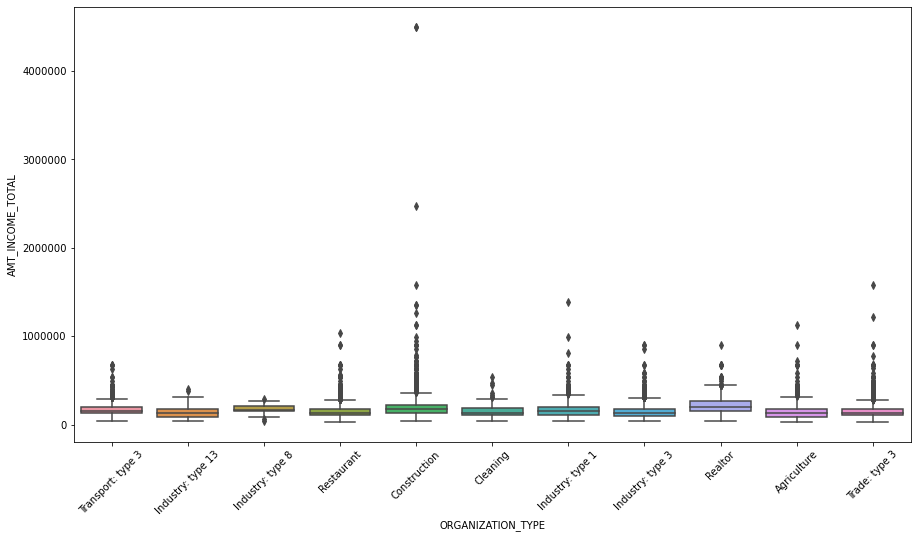

In [16]:
fig, axes = plt.subplots(figsize=(15,8))
sns.boxplot(x='ORGANIZATION_TYPE',y='AMT_INCOME_TOTAL',data=organization_subset,ax=axes,order=list(top10_ogtype.index))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

### Without Outliers

In [10]:
organization_subset = organization_subset[organization_subset['AMT_INCOME_TOTAL']<350000]

,Total_Count,Defaulter_rates
ORGANIZATION_TYPE,,
Transport: type 3,1187,15.754
Industry: type 13,67,13.433
Industry: type 8,24,12.500
Restaurant,1811,11.706
Construction,6721,11.680
Cleaning,260,11.154
Industry: type 1,1039,11.068
Industry: type 3,3278,10.616
Realtor,396,10.606


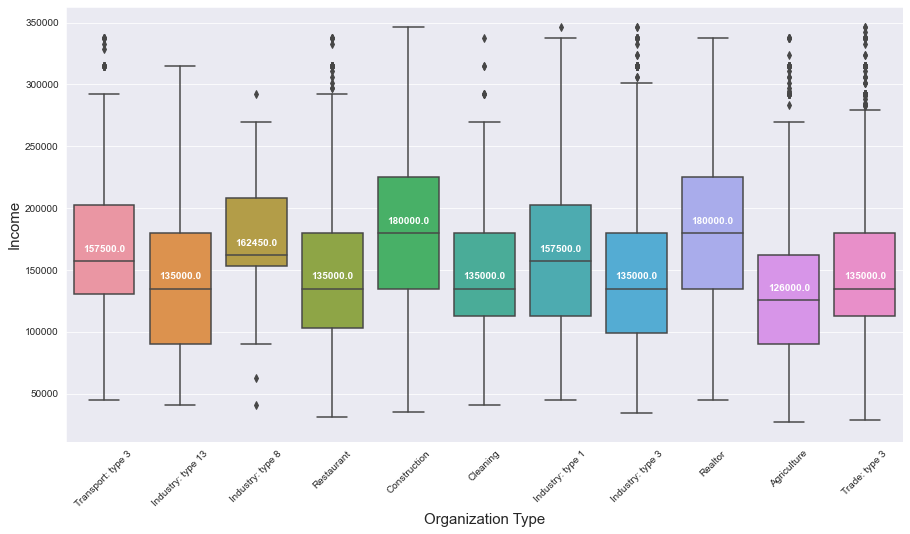

In [17]:
display(top10_ogtype)
fig, axes = plt.subplots(figsize=(15,8))
box_plot = sns.boxplot(x='ORGANIZATION_TYPE',y='AMT_INCOME_TOTAL',data=organization_subset,ax=axes,order=list(top10_ogtype.index))
plt.ticklabel_format(style='plain', axis='y')
# median
medians1 = organization_subset.groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']
medians1 = medians1.reindex(top10_ogtype.index)
vertical_offset = organization_subset['AMT_INCOME_TOTAL'].median() * 0.05
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians1[xtick] + vertical_offset,medians1[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
plt.ylabel('Income',fontsize=15)
plt.xlabel('Organization Type',fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Lowest

In [19]:
low10_ogtype = a[a['Defaulter_rates']<5.7].drop('XNA')
low10_ogtype

,Total_Count,Defaulter_rates
ORGANIZATION_TYPE,,
Insurance,597,5.695
Culture,379,5.541
Bank,2507,5.185
Military,2634,5.125
Police,2341,4.998
University,1327,4.898
Security Ministries,1974,4.863
Trade: type 6,631,4.596
Transport: type 1,201,4.478


In [20]:
organization_subset2 = application[application['ORGANIZATION_TYPE'].isin(list(low10_ogtype.index))]
organization_subset2 = organization_subset2[organization_subset2['AMT_INCOME_TOTAL']<350000]
organization_subset2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
28,100033,0,Cash loans,M,Y,Y,0,"270,000.000","790,830.000","57,676.500","675,000.000",Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046,-9994,-1796,"-4,668.000",-2661,1.000,1,1,0,1,0,1,NaN,1.000,1,1,WEDNESDAY,11,0,1,1,0,0,0,Military,0.600,0.685,0.524,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.000,0.000,0.000,0.000,-849.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,1.000,0.000,1.000
34,100040,0,Cash loans,F,N,Y,0,"135,000.000","1,125,000.000","32,895.000","1,125,000.000",Unaccompanied,State servant,Higher education,Married,House / apartment,0.020,-15997,-4585,"-5,735.000",-4067,nan,1,1,0,1,0,0,Core staff,2.000,2,2,FRIDAY,14,0,0,0,0,0,0,Security Ministries,nan,0.172,nan,0.083,0.080,0.976,0.674,0.006,0.000,0.138,0.167,0.208,0.038,0.067,0.064,0.000,0.000,0.084,0.084,0.976,0.686,0.006,0.000,0.138,0.167,0.208,0.039,0.073,0.066,0.000,0.000,0.083,0.080,0.976,0.678,0.006,0.000,0.138,0.167,0.208,0.039,0.068,0.065,0.000,0.000,reg oper account,block of flats,0.053,"Stone, brick",No,0.000,0.000,0.000,0.000,"-3,019.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,nan,NaN,nan
63,100075,0,Cash loans,F,N,N,0,"112,500.000","95,940.000","10,462.500","90,000.000",Family,Working,Higher education,Single / not married,House / apartment,0.005,-12240,-3720,"-5,246.000",-4541,nan,1,1,0,1,0,0,NaN,1.000,2,2,MONDAY,14,0,0,0,0,0,0,University,0.300,0.665,0.492,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.000,0.000,0.000,0.000,-280.000,0,1,0,0,0,0,0,

,Total_Count,Defaulter_rates
ORGANIZATION_TYPE,,
Insurance,597,5.695
Culture,379,5.541
Bank,2507,5.185
Military,2634,5.125
Police,2341,4.998
University,1327,4.898
Security Ministries,1974,4.863
Trade: type 6,631,4.596
Transport: type 1,201,4.478


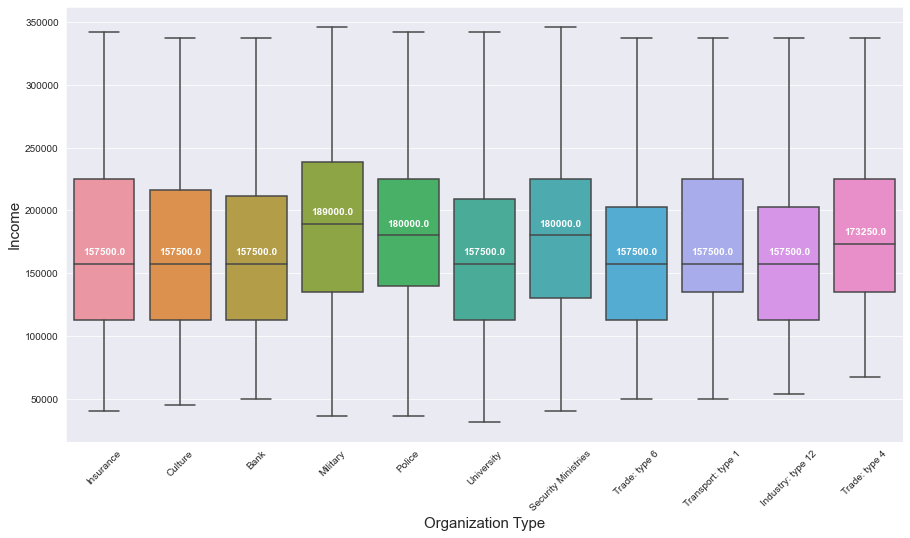

In [21]:
display(low10_ogtype)
fig, axes = plt.subplots(figsize=(15,8))
box_plot = sns.boxplot(x='ORGANIZATION_TYPE',y='AMT_INCOME_TOTAL',data=organization_subset2,ax=axes,order=list(low10_ogtype.index))
plt.ticklabel_format(style='plain', axis='y')
medians2 = organization_subset2.groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']
medians2 = medians2.reindex(low10_ogtype.index)
vertical_offset = organization_subset['AMT_INCOME_TOTAL'].median() * 0.05
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians2[xtick] + vertical_offset,medians2[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
plt.ylabel('Income',fontsize=15)
plt.xlabel('Organization Type',fontsize=15)
plt.xticks(rotation=45)
plt.show()

The clients from organization type with highest defaulters have an average of <b>1,57,509</b> compared to <b>1,74,427</b> of lowest defaulters with a difference of <b>17,000</b> between them

In [66]:
organization_subset.groupby('ORGANIZATION_TYPE').mean()['AMT_INCOME_TOTAL'].mean()

157509.52760767733

In [67]:
organization_subset2.groupby('ORGANIZATION_TYPE').mean()['AMT_INCOME_TOTAL'].mean()

174427.48273571383

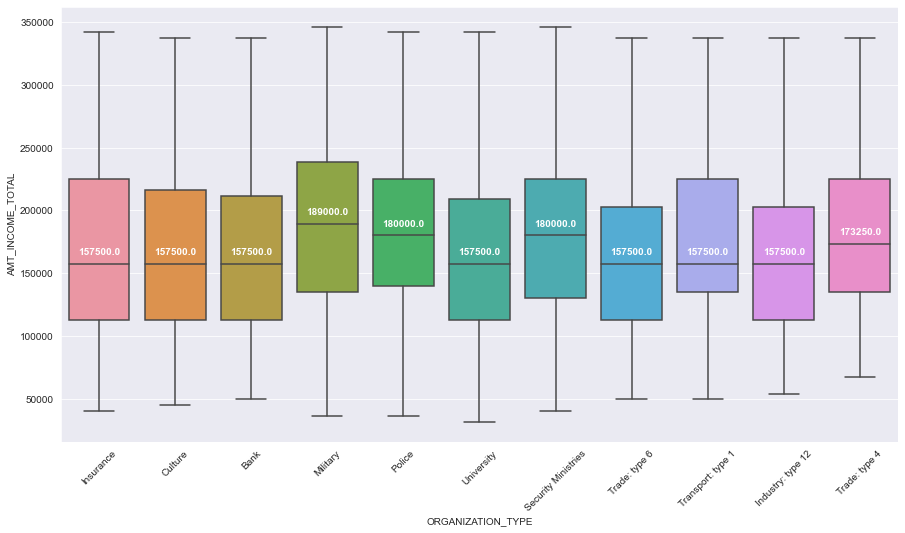

In [22]:
# display(low10_ogtype)
fig, axes = plt.subplots(figsize=(15,8))
box_plot = sns.boxplot(x='ORGANIZATION_TYPE',y='AMT_INCOME_TOTAL',data=organization_subset2,ax=axes,order=list(low10_ogtype.index))
plt.ticklabel_format(style='plain', axis='y')
medians2 = organization_subset2.groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']
medians2 = medians2.reindex(low10_ogtype.index)
vertical_offset = organization_subset['AMT_INCOME_TOTAL'].median() * 0.05
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians2[xtick] + vertical_offset,medians2[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
plt.xticks(rotation=45)
plt.show()

### AGE

In [10]:
application['DAYS_BIRTH'] = np.abs(application['DAYS_BIRTH']/365)

In [11]:
sns.set_style("darkgrid")

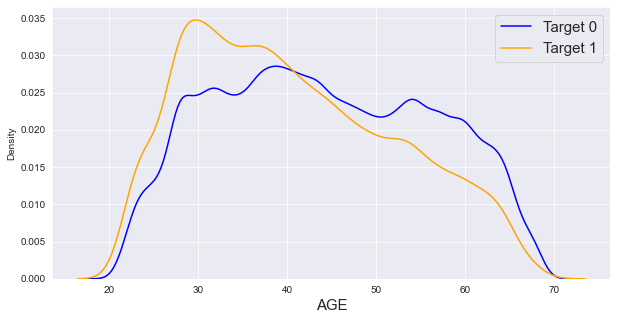

In [120]:
plt.figure(figsize=(10,5))
sns.kdeplot(application[application['TARGET']==0]['DAYS_BIRTH'],label='Target 0',color='blue')
sns.kdeplot(application[application['TARGET']==1]['DAYS_BIRTH'],label='Target 1',color='orange')
plt.ticklabel_format(style='plain', axis='both')
plt.legend(prop={'size':15})
plt.xlabel('AGE',size=15)
plt.show()

The defaulters are higher for clients of age 25-40 and it goes on decreasing with age

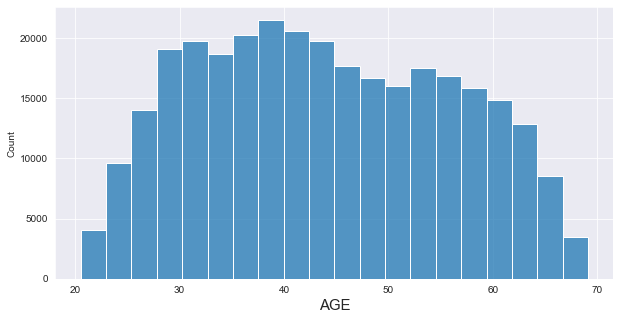

In [119]:
plt.figure(figsize=(10,5))
sns.histplot(application['DAYS_BIRTH'],bins=20)
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('AGE',size=15)
plt.show()

### Age Bins

In [13]:
age_bins = [20,30,40,50,60,70]
application['Age_bins'] = pd.cut(application['DAYS_BIRTH'],bins=age_bins,labels=['20-30','30-40','40-50','50-60','60-70'])

In [14]:
a = application.groupby(['Age_bins','TARGET']).count()[['SK_ID_CURR']]
a_default = a/a.groupby(level=0).sum()*100
a_default = a_default.unstack().drop(('SK_ID_CURR',0),axis=1).stack().droplevel(level=-1)
a_default

,SK_ID_CURR
Age_bins,
20-30,11.457
30-40,9.584
40-50,7.651
50-60,6.130
60-70,4.921


In [41]:
a = organization_subset.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = organization_subset.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.unstack().drop([('SK_ID_CURR',0),('Defaulter_rates',0)],axis=1).stack().droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'Totalcount'}).sort_values('Defaulter_rates',ascending=False)
a

Totalcount  Defaulter_rates
ORGANIZATION_TYPE OCCUPATION_TYPE                                  
Transport: type 3 Waiters/barmen staff           1          100.000
                  Core staff                     1          100.000
Realtor           Security staff                 1          100.000
Transport: type 3 Sales staff                    1          100.000
Industry: type 1  Low-skill Laborers            16           56.250
...                                            ...              ...
Industry: type 3  Accountants                   92            4.348
Construction      Accountants                  327            4.281
Trade: type 3     Accountants                   48            4.167
Industry: type 3  Managers                     105            3.810
Industry: type 1  Accountants                   37            2.703

[103 rows x 2 columns]

In [71]:
a_top = a[a['Totalcount']>16]
a_top = a_top.drop(['Secretaries','Waiters/barmen staff','Private service staff','Realty agents','HR staff'],level=1)
a_top

,,Totalcount,Defaulter_rates
ORGANIZATION_TYPE,OCCUPATION_TYPE,,
Construction,Low-skill Laborers,71,26.761
Industry: type 1,Security staff,22,22.727
Transport: type 3,Laborers,41,19.512
Restaurant,Security staff,17,17.647
Industry: type 3,Low-skill Laborers,85,17.647
Trade: type 3,Cooking staff,96,16.667
Cleaning,Cleaning staff,75,16.000
Transport: type 3,Drivers,928,15.841
Restaurant,Cleaning staff,73,15.068


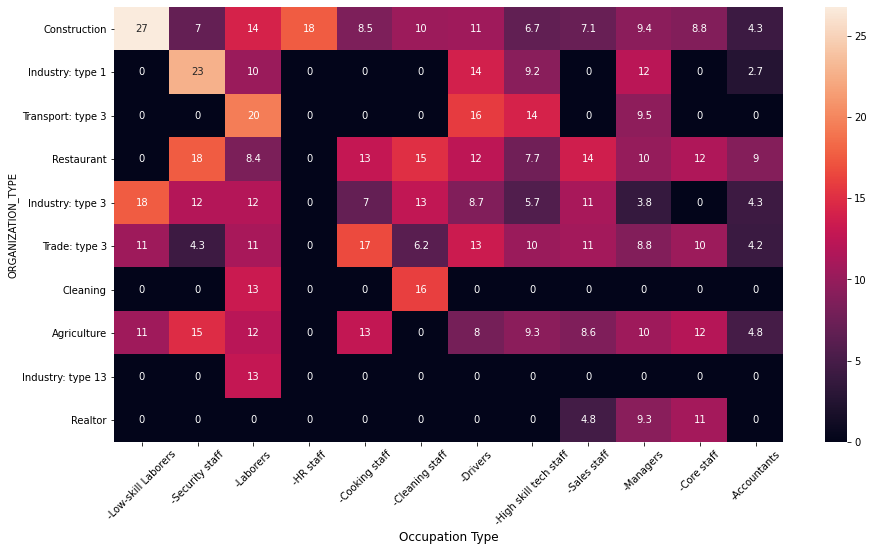

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(a_top.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0),annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=12)
plt.show()

__Low skilled Laborers__ from Construction type organization have the higher defaulter rate at __27%__ followed by __Security Staff__ from Industry type 1 and __Laborers__ from Transport type 3 with __23__ and __20%__ respectively

In [129]:
a = organization_subset2.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = organization_subset2.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'Totalcount'}).sort_values('Defaulter_rates')
# a.head(100)

Totalcount  Defaulter_rates
ORGANIZATION_TYPE   OCCUPATION_TYPE                                   
University          Core staff                    253            1.581
                    Accountants                    54            1.852
Bank                Sales staff                    53            1.887
Police              Managers                      170            2.353
Security Ministries Cleaning staff                 42            2.381
Trade: type 6       Core staff                     40            2.500
Industry: type 12   Laborers                       80            2.500
Security Ministries Managers                      156            2.564
Military            Security staff                 37            2.703
Bank                Managers                      181            2.762
Industry: type 12   High skill tech staff         105            2.857
Culture             Managers                       35            2.857
Military            High skill tech staff         170            2.941
Security Ministries Laborers                       98            3.061
                    Secretaries                    97            3.093
Transport: type 1   Laborers                       28            3.571
Security Ministries Security staff                 54            3.704
University          Managers                       95            4.211
Bank                Accountants                   443            4.515
Trade: type 6       Sales staff                    22            4.545
Military            Managers                      370            4.595
Insurance           Core staff                    325            4.615
Military            Cooking staff                  42            4.762
Industry: type 12   Managers                       41            4.878
Police              Core staff                   1311            4.882
Security Ministries Medicine staff                 60            5.000
Trade: type 4       Core staff                     20            5.000
Trade: type 6       High skill tech staff         220            5.000
Military            Medicine staff                 58            5.172
University          High skill tech staff         149            5.369
                    Medicine staff                 55            5.455
Security Ministries Core staff                    529            5.482
Transport: type 1   High skill tech staff          18            5.556
Military            Sales staff                    18            5.556
Bank                Drivers                        54            5.556
Police              High skill tech staff          69            5.797
Culture             High skill tech staff          17            5.882
Insurance           Accountants                    17            5.882
Culture             Accountants                    17            5.882
Bank                Core staff                   1218            5.993
Military            Core staff                    514            6.031
Transport: type 1   Core staff                     33            6.061
Military            Laborers                      418            6.220
Industry: type 12   Drivers                        16            6.250
University          Cleaning staff                 78            6.410
Security Ministries High skill tech staff         122            6.557
Police              Drivers                       166            6.627
Culture             Core staff                    120            6.667
Security Ministries Cooking staff                  15            6.667
Insurance           Laborers                       29            6.897
University          Drivers                        28            7.143
Military            Drivers                       176            7.386
University          Cooking staff                  27            7.407
Insurance           Managers                       54            7.407
Police              Cleaning staff                 26            7.

In [140]:
a_low = a[a['Totalcount']>16]
# a_low = a_low.drop(['Secretaries','Waiters/barmen staff','Private service staff','Realty agents','HR staff'],level=1)
a_low = a_low[:20]
a_low

Totalcount  Defaulter_rates
ORGANIZATION_TYPE   OCCUPATION_TYPE                                   
University          Core staff                    253            1.581
                    Accountants                    54            1.852
Bank                Sales staff                    53            1.887
Police              Managers                      170            2.353
Security Ministries Cleaning staff                 42            2.381
Trade: type 6       Core staff                     40            2.500
Industry: type 12   Laborers                       80            2.500
Security Ministries Managers                      156            2.564
Military            Security staff                 37            2.703
Bank                Managers                      181            2.762
Industry: type 12   High skill tech staff         105            2.857
Culture             Managers                       35            2.857
Military            High skill tech staff         170            2.941
Security Ministries Laborers                       98            3.061
                    Secretaries                    97            3.093
Transport: type 1   Laborers                       28            3.571
Security Ministries Security staff                 54            3.704
University          Managers                       95            4.211
Bank                Accountants                   443            4.515
Trade: type 6       Sales staff                    22            4.545

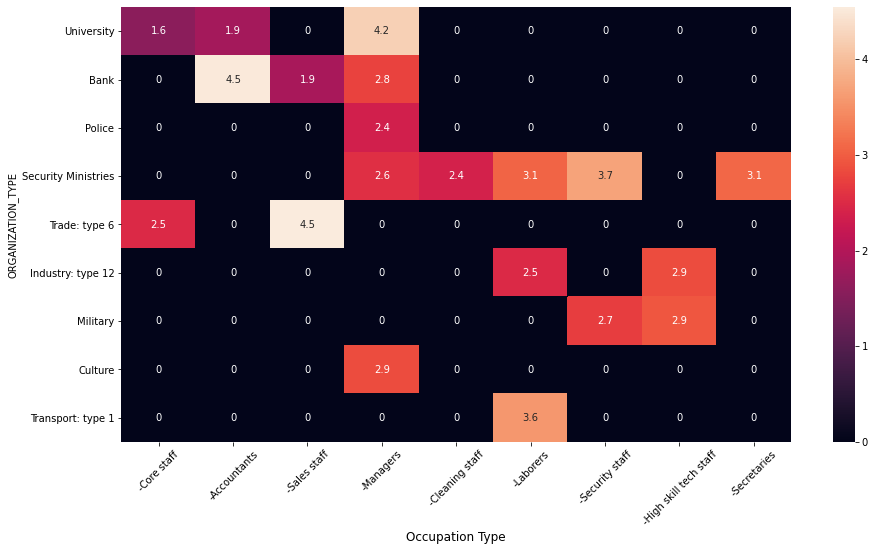

In [141]:
plt.figure(figsize=(15,8))
sns.heatmap(a_low.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0),annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=12)
plt.show()

- __Core staff__ from __University__ type have the lowest defaulter rate at __1.58%__ followed by __Accountants__ from  __University__ and __Sales Staff__ from __Banks__ at __1.85%__ and __1.89%__ respectively.
- 

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(a_low.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0),annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=12)
plt.show()

### Organization Type with Occupation Type defaulters for whole Dataset

In [146]:
a = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.unstack().drop([('SK_ID_CURR',0),('Defaulter_rates',0)],axis=1).stack().droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'Totalcount'}).sort_values('Defaulter_rates',ascending=False)
a_top = a[a['Totalcount']>16]
# a_top = a_top.drop(['Secretaries','Waiters/barmen staff','Private service staff','Realty agents','HR staff'],level=1)
a_top = a_top[:15]
a_top

,,Totalcount,Defaulter_rates
ORGANIZATION_TYPE,OCCUPATION_TYPE,,
Construction,Low-skill Laborers,71,26.761
Industry: type 1,Security staff,22,22.727
Housing,Low-skill Laborers,23,21.739
Transport: type 4,Low-skill Laborers,23,21.739
Trade: type 7,Low-skill Laborers,74,20.270
Government,Low-skill Laborers,51,19.608
Self-employed,Low-skill Laborers,419,19.332
Transport: type 3,Laborers,42,19.048
Hotel,Cleaning staff,27,18.519


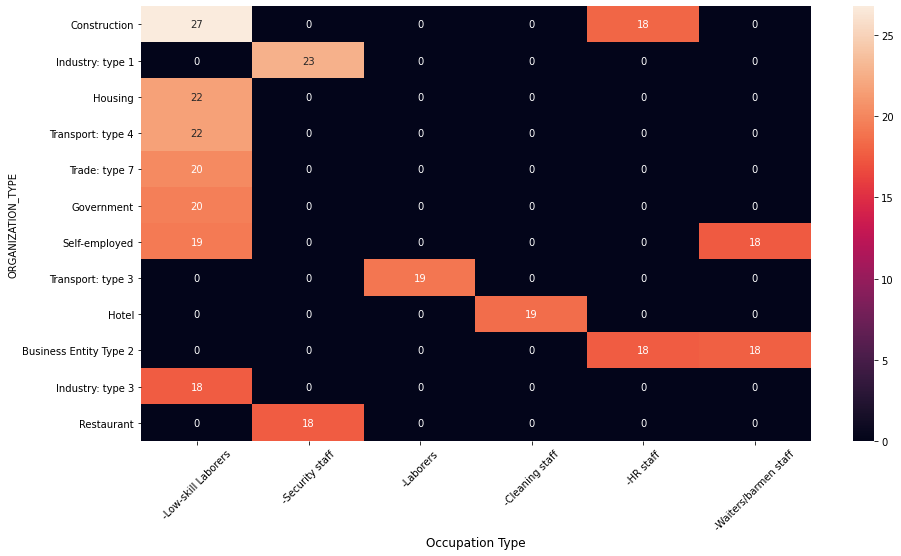

In [147]:
plt.figure(figsize=(15,8))
sns.heatmap(a_top.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0),annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=12)
plt.show()

- __Low skilled Laborers__ from __Construction__ type organization have the highest defaulter rate at __27%__ followed by __Security   Staff__ from __Industry type 1__ and Low Skill Laborers from Housing with __23__ and __21%__ respectively


In [8]:
a = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'Totalcount'}).sort_values('Defaulter_rates')
a_low = a[a['Totalcount']>15]
# a_low = a_low.drop(['Secretaries','Waiters/barmen staff','Private service staff','Realty agents','HR staff'],level=1)
a_low = a_low[:18]
a_low

,,Totalcount,Defaulter_rates
ORGANIZATION_TYPE,OCCUPATION_TYPE,,
Industry: type 9,Core staff,85,1.176
Kindergarten,High skill tech staff,81,1.235
Industry: type 11,Accountants,78,1.282
Transport: type 2,Managers,73,1.370
Trade: type 6,Managers,73,1.370
University,Core staff,276,1.449
Electricity,Managers,59,1.695
University,Accountants,59,1.695
Emergency,High skill tech staff,57,1.754


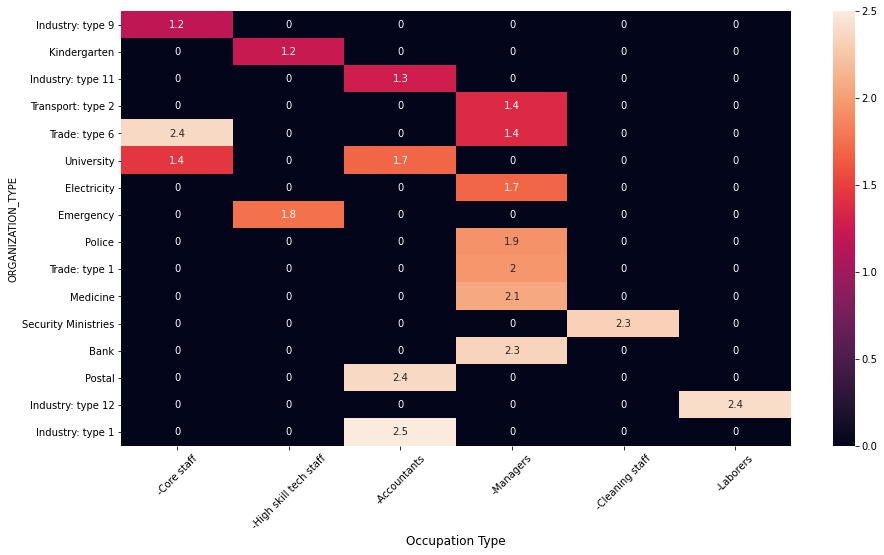

In [150]:
plt.figure(figsize=(15,8))
sns.heatmap(a_low.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0),annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=12)
plt.show()

- __Core Staff__ from __Industry type 9__ have the lowest defaulter rate at __1.176%__ followed by __High Skill Tech Staff__ from __Kindergarten__ and __Accountants__ from __Industry type 11__ at __1.235%__ and __1.282%__ respectively followed by __Managers__ from __Transport type2__ at __1.370%__
- But all of these top __10__ combined only contribute to __0.34%__ of the total Clients 
- So we should focus on bringing more clients from these organizations and occupations.

In [189]:
a = application.groupby(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                    'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                    'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                    'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                    'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                     'TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                    'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                    'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                    'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                    'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a = a.drop(0,level=-1)
a_default = a_default.drop(0,level=-1)
a['Defaulter_rates'] = a_default
a = a.rename(columns={'SK_ID_CURR':'Totalcount'})
a['Totalcount'] = a_level1
a = a.sort_values('Defaulter_rates',ascending=False)
a

Totalcount  \
FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 TARGET               
0               0               0               0               1               0               0               0               0                0                0                0                0                0                0                0                0                1                1                0                1                1   
                1               0               0               0               0               0               0               0                0                0                0                0                0                0                0                1                0                0                1                1                2   
                0               0               0               0               0               1               0               0                0                0                0                0                0                1                0                0                0                1                1                1                1   
                                                                                                                                                                                                                                                                                                          0                1                1                1   
                                                                                                                                                                                                                                      0                0                1                0                0                1                1                2   
                1               0               0               0               0               0               0               0                0                0                0                0                0                0                0                0                0                0                1                1                4   
1               0               0               0               0               0               0               0               0                0                0                0                0                0                0                0                0                0                0                0                1               13   
0               1               0               0               0               0               0               0               0                0                0                0                0                0                0                0                1                0                1                0                1               47   
                                                                                                                                                 1                0                0                0                0                0                0                0                0                0                0                1               42   
                                                                                                                                                 0                0                0                1                0                0                0                0                0                1                0                1                9   
                                                                                            

### Total no of Documents

In [11]:
application['TotalNo_of_Documents'] = application.iloc[:,96:116].sum(axis=1)

In [16]:
a = application.groupby(['TotalNo_of_Documents','TARGET']).count()[['SK_ID_CURR']]
a_default = a/a.groupby(level=0).sum()*100
a_count = a.groupby(level=0).sum()
a['Defaulter_rate'] = a_default
a = a.drop(0,level=1).droplevel(level=-1)
a['SK_ID_CURR'] = a_count
a = a.rename(columns={'SK_ID_CURR':'Total_Count'})
print('Total No of Documents')
display(a)

Total No of Documents


,Total_Count,Defaulter_rate
TotalNo_of_Documents,,
0,29549,5.523
1,270056,8.449
2,7742,4.637
3,163,9.816
4,1,100.000


In [98]:
application[application['TotalNo_of_Documents']==2].iloc[:,96:116]

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
6,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
72,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
73,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307191,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
307207,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
307261,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
307320,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## FLAG_DOCUMENT_3 is our most important document with a defaulter rate of 

In [99]:
application[application['TotalNo_of_Documents']==3][['TARGET']]

,TARGET
1402,0
1999,0
4027,0
7826,0
9525,0
...,...
297620,0
300259,0
301407,0
304282,0


### External Source Average

In [5]:
application['External_Source_Avg'] = application.iloc[:,41:44].mean(axis=1)

In [6]:
application['source_bins'] = pd.qcut(application['External_Source_Avg'],q=4)

In [10]:
a = application.groupby(['source_bins','TARGET']).count()[['SK_ID_CURR']]
a = a/a.groupby(level=0).sum()*100
a = a.drop(0,level=-1)
a = a.droplevel(level=-1).rename(columns={'SK_ID_CURR':'DEFAULTER_RATES'})
print('External Scource Scores average')
display(a)

External Scource Scores average


,DEFAULTER_RATES
source_bins,
"(-0.00099406, 0.414]",17.285
"(0.414, 0.525]",7.711
"(0.525, 0.623]",4.583
"(0.623, 0.879]",2.712


In [20]:
ranges = [25649,120000,200000,117000000]
application['INCOME_BINS'] = pd.cut(application['AMT_INCOME_TOTAL'],bins=ranges,precision=0, labels=['Low','Medium','High' ])

In [28]:
a = application.groupby(['INCOME_BINS','TARGET']).count()[['SK_ID_CURR']]
a = a/a.groupby(level=0).sum()*100
a = a.drop(0,level=-1).rename(columns={'SK_ID_CURR':'DEFAULTER_RATES'})
# a = a.droplevel(level=-1).reset_index()
a.droplevel(level=-1).reset_index()

,INCOME_BINS,DEFAULTER_RATES
0,Low,8.406
1,Medium,8.485
2,High,7.136


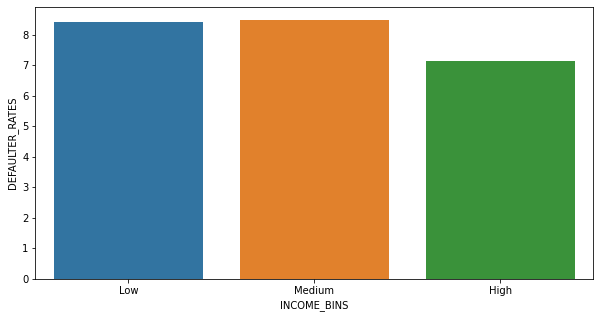

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='INCOME_BINS',y='DEFAULTER_RATES',data=a.reset_index())
plt.show()

### Correlation

In [157]:
corr_sample = application.corr()
# corr_sample = corr_sample.stack().reset_index().sort_values(0,ascending=False)

In [158]:
upper = corr_sample.where(np.triu(np.ones(corr_sample.shape), k=1).astype(np.bool))
upper = upper.stack().reset_index().sort_values(0,ascending=False)
pos_corr = upper[(upper[0]>0.5)&(upper[0]!=1)].reset_index()
neg_corr = upper[(upper[0]<-0.4)&(upper[0]!=-1)].reset_index()

In [159]:
pos_corr.iloc[:100]

,index,level_0,level_1,0
0,990,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,0.998
1,1943,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998
2,1200,FLOORSMIN_AVG,FLOORSMIN_MEDI,0.997
3,1160,FLOORSMAX_AVG,FLOORSMAX_MEDI,0.997
4,1119,ENTRANCES_AVG,ENTRANCES_MEDI,0.997
5,1077,ELEVATORS_AVG,ELEVATORS_MEDI,0.996
6,1034,COMMONAREA_AVG,COMMONAREA_MEDI,0.996
7,1314,LIVINGAREA_AVG,LIVINGAREA_MEDI,0.996
8,852,APARTMENTS_AVG,APARTMENTS_MEDI,0.995
9,899,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,0.994


In [169]:
neg_corr

,index,level_0,level_1,0
0,887,DAYS_BIRTH,FLAG_DOCUMENT_6,-0.407
1,5234,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,-0.466
2,5232,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,-0.486
3,727,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,-0.532
4,726,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,-0.533
5,1420,FLAG_EMP_PHONE,FLAG_DOCUMENT_6,-0.598
6,832,DAYS_BIRTH,EXT_SOURCE_1,-0.601
7,812,DAYS_BIRTH,DAYS_EMPLOYED,-0.616
8,913,DAYS_EMPLOYED,FLAG_EMP_PHONE,-1.000


In [72]:
num,cat

(Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
        'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
        'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
        'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
        'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
        'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
       dtype='object'),
 Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
        'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
        'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
        'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
        'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
        'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
        'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'],
       dtype='object'))

In [ ]:
previous_application['DAYS_TERMINATION'].value_counts()